In [ ]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt  # 用于后续的数据可视化

# mat数据读取

In [ ]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt  # 用于后续的数据可视化

# 1. 指定.mat文件的路径
file_path = '源域数据集/12kHz_DE_data/B/0007/B007_0.mat'  # 请将此处替换为您实际的文件路径

# 2. 使用loadmat函数加载文件
#    设置 squeeze_roots=True 可以自动解包单维度的数组，让数据更简洁
mat_data = loadmat(file_path, squeeze_me=True)

# 3. 探索加载的数据对象
#    loadmat返回的是一个字典，键是MATLAB工作区中的变量名，值是对应的NumPy数组
print("文件中包含的所有变量名：")
for key in mat_data.keys():
    # 过滤掉以'__'开头和结尾的MATLAB自带元数据
    if not key.startswith('__'):
        print(f"- {key}: {type(mat_data[key])}, Shape: {np.shape(mat_data[key])}")

# 4. 提取您需要的特定变量（根据您的图片）
#    提取时间序列数据
de_signal = mat_data['X118_DE_time']  # 驱动端(Drive End)传感器数据
de_signal = de_signal[1023 * 41:1023 * 42]
#    提取转速值
# rpm_value = mat_data['X105RPM']       # 转速值，是一个标量
# de_signal[de_signal>2.8]=2.8
# 5. 验证数据
# print(f"\n转速 RPM = {rpm_value}")
print(f"驱动端(DE)信号形状: {de_signal.shape}")

# 6. (可选) 简单绘制其中一条时间序列进行可视化
fs = 12000  # 示例采样率，您需要根据数据实际情况修改或从其他地方获取
time_axis = np.arange(len(de_signal)) / fs  # 创建时间轴

plt.figure(figsize=(12, 4))
plt.plot(time_axis, de_signal)
plt.title('X118_DE_time Signal (Drive End)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# 示例：生成一个包含50Hz和120Hz的复合正弦波信号，用于演示
fs = 12000  # 采样率 (Hz)
T = 1 / fs  # 采样间隔
L = 96000  # 信号长度(点数)
t = np.arange(L) * T  # 时间轴
# 绘制时域图
plt.figure(figsize=(10, 4))
plt.plot(t, mat_data['X118_DE_time'])
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy import signal  # 导入信号处理模块

# 1. 指定.mat文件的路径
file_path = '源域数据集/12kHz_DE_data/B/0007/B007_0.mat'  # 请将此处替换为您实际的文件路径

# 2. 使用loadmat函数加载文件
mat_data = loadmat(file_path, squeeze_me=True)

# 3. 提取时间序列数据
de_signal = mat_data['X118_DE_time']  # 驱动端(Drive End)传感器数据
de_signal = de_signal[1023 * 41:1023 * 42]

# 4. 添加滤波器来平滑数据
# 方法1: 移动平均滤波器
window_size = 21  # 窗口大小，可根据需要调整
smoothed_signal_ma = np.convolve(de_signal, np.ones(window_size)/window_size, mode='same')

# 方法2: 使用Savitzky-Golay滤波器 (更高级的平滑方法)
smoothed_signal_sg = signal.savgol_filter(de_signal, window_length=31, polyorder=4)

# 方法3: 低通滤波器 (Butterworth滤波器)
fs = 12000  # 采样率
cutoff_freq = 1000  # 截止频率，可根据需要调整
nyquist = 0.5 * fs
normal_cutoff = cutoff_freq / nyquist
b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)
smoothed_signal_lp = signal.filtfilt(b, a, de_signal)

# 方法4: 中值滤波器 (对脉冲噪声有效)
smoothed_signal_med = signal.medfilt(de_signal, kernel_size=11)

# 5. 创建时间轴
time_axis = np.arange(len(de_signal)) / fs

# 6. 为每种滤波器创建单独的对比图像
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('不同滤波器平滑效果对比', fontsize=16)

# 移动平均滤波器对比
axes[0, 0].plot(time_axis, de_signal, label='原始信号', alpha=0.7, linewidth=1)
axes[0, 0].plot(time_axis, smoothed_signal_ma, label='移动平均滤波', linewidth=2, color='red')
axes[0, 0].set_title('移动平均滤波器 (窗口大小={})'.format(window_size))
axes[0, 0].set_xlabel('Time [s]')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Savitzky-Golay滤波器对比
axes[0, 1].plot(time_axis, de_signal, label='原始信号', alpha=0.7, linewidth=1)
axes[0, 1].plot(time_axis, smoothed_signal_sg, label='Savitzky-Golay滤波', linewidth=2, color='green')
axes[0, 1].set_title('Savitzky-Golay滤波器 (窗口=21, 阶数=3)')
axes[0, 1].set_xlabel('Time [s]')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].grid(True)
axes[0, 1].legend()

# 低通滤波器对比
axes[1, 0].plot(time_axis, de_signal, label='原始信号', alpha=0.7, linewidth=1)
axes[1, 0].plot(time_axis, smoothed_signal_lp, label='低通滤波', linewidth=2, color='purple')
axes[1, 0].set_title('低通滤波器 (截止频率={}Hz)'.format(cutoff_freq))
axes[1, 0].set_xlabel('Time [s]')
axes[1, 0].set_ylabel('Amplitude')
axes[1, 0].grid(True)
axes[1, 0].legend()

# 中值滤波器对比
axes[1, 1].plot(time_axis, de_signal, label='原始信号', alpha=0.7, linewidth=1)
axes[1, 1].plot(time_axis, smoothed_signal_med, label='中值滤波', linewidth=2, color='orange')
axes[1, 1].set_title('中值滤波器 (核大小=11)')
axes[1, 1].set_xlabel('Time [s]')
axes[1, 1].set_ylabel('Amplitude')
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# 7. 添加一个综合对比图
plt.figure(figsize=(12, 8))
plt.plot(time_axis, de_signal, label='原始信号', alpha=0.5, linewidth=1)
plt.plot(time_axis, smoothed_signal_ma, label='移动平均滤波', linewidth=2)
plt.plot(time_axis, smoothed_signal_sg, label='Savitzky-Golay滤波', linewidth=2)
plt.plot(time_axis, smoothed_signal_lp, label='低通滤波', linewidth=2)
plt.plot(time_axis, smoothed_signal_med, label='中值滤波', linewidth=2)
plt.title('所有滤波器效果综合对比')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 傅里叶变换

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# 计算FFT
Y = fft(mat_data['X118_DE_time'])  # Y是复数数组，包含频率的幅度和相位信息

# 计算双边频谱
P2 = np.abs(Y / L)  # 取绝对值得到幅度，除以L进行缩放
# 取前半部分，并乘以2（因为双边频谱的能量对称，乘2以恢复单边幅值）
P1 = P2[:L // 2] * 2
P1[0] = P2[0]  # 直流分量（0Hz）不需要乘2

# 计算频率轴
f = fftfreq(L, T)[:L // 2]  # fftfreq生成频率轴，我们只取前半部分

# 绘制频域图（单边振幅谱）
plt.figure(figsize=(10, 4))
plt.plot(f, P1)
plt.title('Single-Sided Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(2000, 4000)  # 限制x轴范围，以便更好地观察50Hz和120Hz的峰值
plt.tight_layout()
plt.show()

In [ ]:
# 假设您已从.mat文件加载了数据
de_signal = mat_data['X118_DE_time']  # 驱动端数据
fs = 12000  # 根据您的数据设置采样率，例如12kHz

L = len(de_signal)
T = 1 / fs

# 计算FFT和频率轴
Y = fft(de_signal)
f = fftfreq(L, T)[:L // 2]
P1 = np.abs(Y / L)[:L // 2] * 2

# 绘制频谱图，重点关注高频段（轴承故障特征通常在高频）
plt.plot(f, P1)
plt.title('Drive End Vibration Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(0, 2000)  # 根据您计算的故障特征频率范围调整x轴，例如0-2000Hz
plt.show()

# 然后，您可以在图上标注计算出的BPFO, BPFI等位置，观察是否有峰值突起。

# 递归获取文件路径

In [ ]:
import os

# 定义根目录（请替换为您电脑上的实际绝对路径，例如：C:\Users\YourName\源域数据集）
root_dir = "源域数据集/12kHz_DE_data/B/0007"

# 创建一个空列表来存储所有文件的路径
all_file_paths = []

# 遍历根目录及其所有子文件夹
for foldername, subfolders, filenames in os.walk(root_dir):
    for filename in filenames:
        # 拼接完整路径，并添加到列表中
        full_path = os.path.join(foldername, filename)
        all_file_paths.append(full_path)

# 打印所有路径
for path in all_file_paths:
    print(path)

# 现在，all_file_paths 这个列表里就包含了所有文件的完整路径

In [ ]:

for file_path in all_file_paths:
    # 1. 指定.mat文件的路径
    # file_path = '源域数据集/12kHz_DE_data/B/0007/B007_0.mat'  # 请将此处替换为您实际的文件路径

    # 2. 使用loadmat函数加载文件
    #    设置 squeeze_roots=True 可以自动解包单维度的数组，让数据更简洁
    mat_data = loadmat(file_path, squeeze_me=True)

    # 3. 探索加载的数据对象
    #    loadmat返回的是一个字典，键是MATLAB工作区中的变量名，值是对应的NumPy数组
    print("文件中包含的所有变量名：")
    for key in mat_data.keys():
        # 过滤掉以'__'开头和结尾的MATLAB自带元数据
        if key.find('_time') != -1:
            print(f"-{file_path}:__key: {key}: __{type(mat_data[key])}__, Shape: {np.shape(mat_data[key])}")
    #         获取到data
            de_signal = mat_data[key]  # 驱动端(Drive End)传感器数据
            # savitzky(de_signal)
    # 4. 提取您需要的特定变量（根据您的图片）
    #    提取时间序列数据
    # de_signal = mat_data['X118_DE_time']  # 驱动端(Drive End)传感器数据

# 滤波效果对比

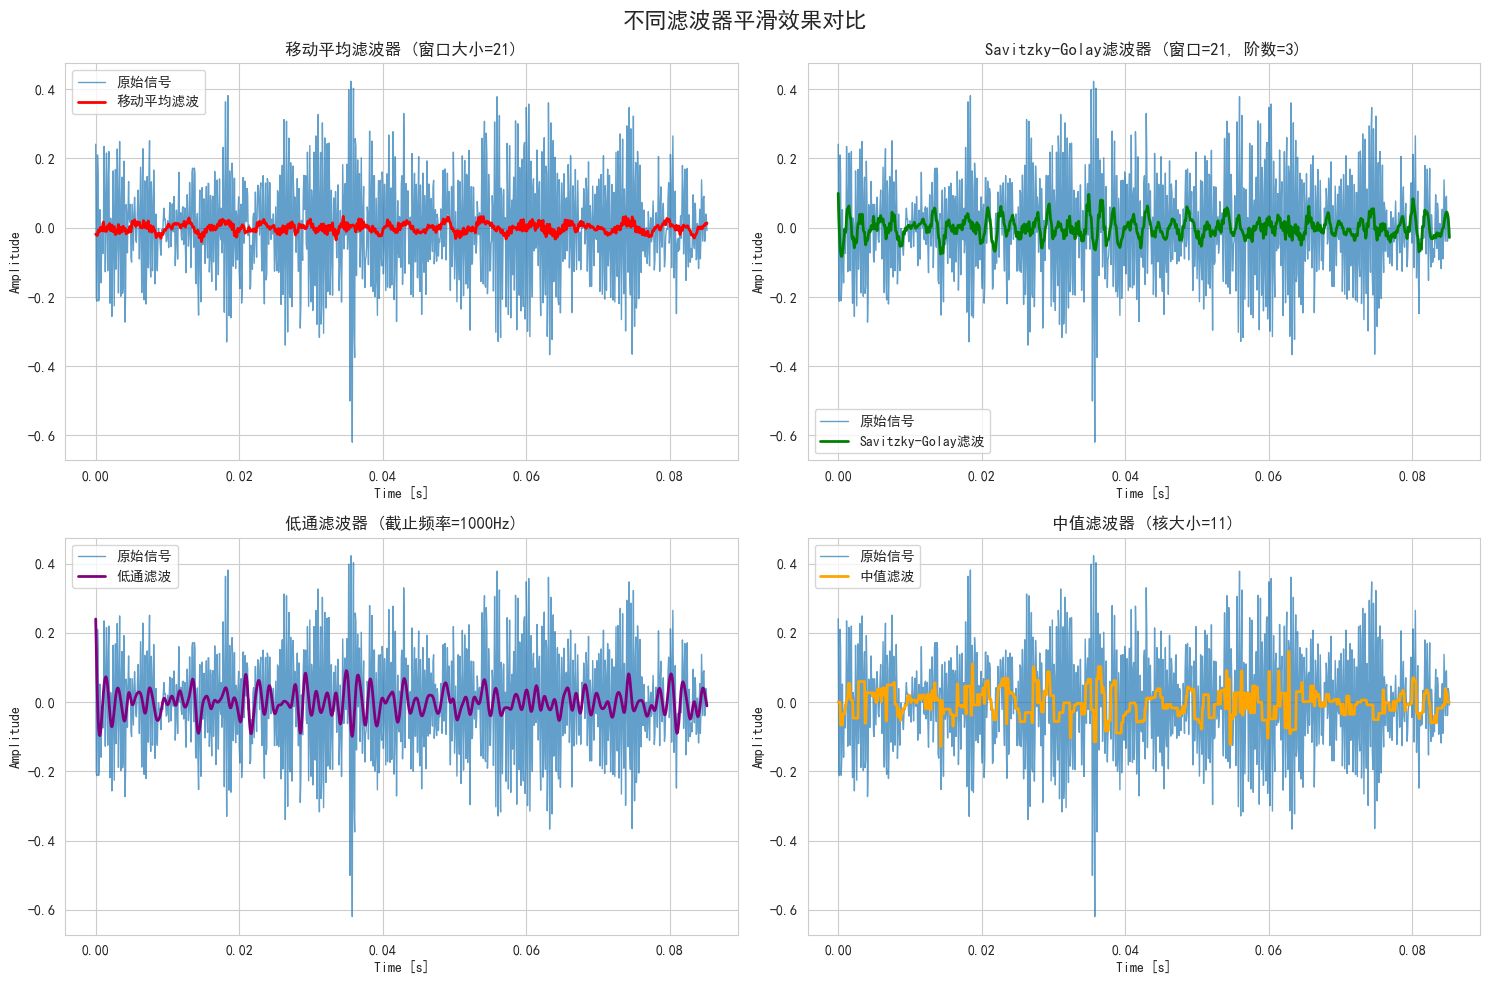

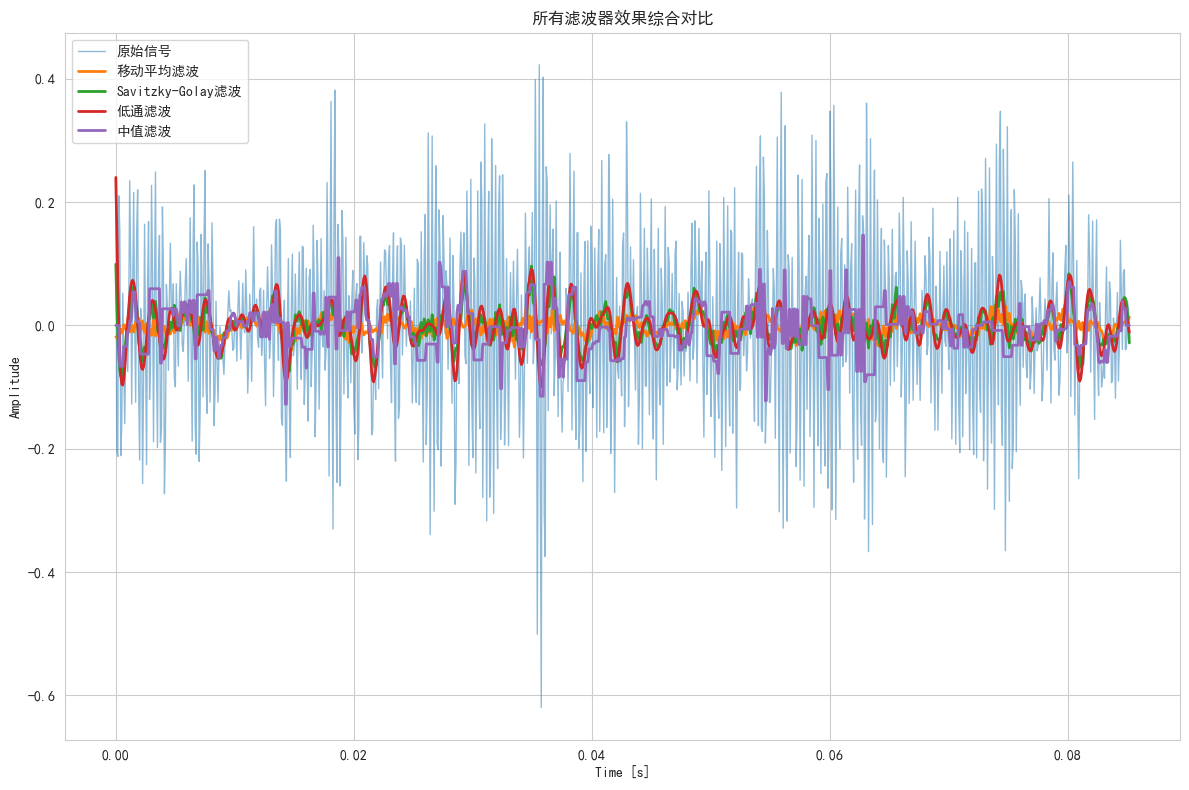

In [50]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy import signal  # 导入信号处理模块

# 1. 指定.mat文件的路径
file_path = '源域数据集/12kHz_DE_data/B/0007/B007_0.mat'  # 请将此处替换为您实际的文件路径

# 2. 使用loadmat函数加载文件
mat_data = loadmat(file_path, squeeze_me=True)

# 3. 提取时间序列数据
de_signal = mat_data['X118_DE_time']  # 驱动端(Drive End)传感器数据
de_signal = de_signal[1023 * 41:1023 * 42]

# 4. 添加滤波器来平滑数据
# 方法1: 移动平均滤波器
window_size = 21  # 窗口大小，可根据需要调整
smoothed_signal_ma = np.convolve(de_signal, np.ones(window_size)/window_size, mode='same')

# 方法2: 使用Savitzky-Golay滤波器 (更高级的平滑方法)
smoothed_signal_sg = signal.savgol_filter(de_signal, window_length=21, polyorder=3)

# 方法3: 低通滤波器 (Butterworth滤波器)
fs = 12000  # 采样率
cutoff_freq = 1000  # 截止频率，可根据需要调整
nyquist = 0.5 * fs
normal_cutoff = cutoff_freq / nyquist
b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)
smoothed_signal_lp = signal.filtfilt(b, a, de_signal)

# 方法4: 中值滤波器 (对脉冲噪声有效)
smoothed_signal_med = signal.medfilt(de_signal, kernel_size=11)

# 5. 创建时间轴
time_axis = np.arange(len(de_signal)) / fs

# 6. 为每种滤波器创建单独的对比图像
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('不同滤波器平滑效果对比', fontsize=16)

# 移动平均滤波器对比
axes[0, 0].plot(time_axis, de_signal, label='原始信号', alpha=0.7, linewidth=1)
axes[0, 0].plot(time_axis, smoothed_signal_ma, label='移动平均滤波', linewidth=2, color='red')
axes[0, 0].set_title('移动平均滤波器 (窗口大小={})'.format(window_size))
axes[0, 0].set_xlabel('Time [s]')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Savitzky-Golay滤波器对比
axes[0, 1].plot(time_axis, de_signal, label='原始信号', alpha=0.7, linewidth=1)
axes[0, 1].plot(time_axis, smoothed_signal_sg, label='Savitzky-Golay滤波', linewidth=2, color='green')
axes[0, 1].set_title('Savitzky-Golay滤波器 (窗口=21, 阶数=3)')
axes[0, 1].set_xlabel('Time [s]')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].grid(True)
axes[0, 1].legend()

# 低通滤波器对比
axes[1, 0].plot(time_axis, de_signal, label='原始信号', alpha=0.7, linewidth=1)
axes[1, 0].plot(time_axis, smoothed_signal_lp, label='低通滤波', linewidth=2, color='purple')
axes[1, 0].set_title('低通滤波器 (截止频率={}Hz)'.format(cutoff_freq))
axes[1, 0].set_xlabel('Time [s]')
axes[1, 0].set_ylabel('Amplitude')
axes[1, 0].grid(True)
axes[1, 0].legend()

# 中值滤波器对比
axes[1, 1].plot(time_axis, de_signal, label='原始信号', alpha=0.7, linewidth=1)
axes[1, 1].plot(time_axis, smoothed_signal_med, label='中值滤波', linewidth=2, color='orange')
axes[1, 1].set_title('中值滤波器 (核大小=11)')
axes[1, 1].set_xlabel('Time [s]')
axes[1, 1].set_ylabel('Amplitude')
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# 7. 添加一个综合对比图
plt.figure(figsize=(12, 8))
plt.plot(time_axis, de_signal, label='原始信号', alpha=0.5, linewidth=1)
plt.plot(time_axis, smoothed_signal_ma, label='移动平均滤波', linewidth=2)
plt.plot(time_axis, smoothed_signal_sg, label='Savitzky-Golay滤波', linewidth=2)
plt.plot(time_axis, smoothed_signal_lp, label='低通滤波', linewidth=2)
plt.plot(time_axis, smoothed_signal_med, label='中值滤波', linewidth=2)
plt.title('所有滤波器效果综合对比')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

滤波器性能评估:
移动平均                 RMSE: 0.144539, SNR改善: 21.16 dB, 平滑度: 0.009174, 相关系数: -0.1453
Savitzky-Golay       RMSE: 0.135976, SNR改善: 14.19 dB, 平滑度: 0.012809, 相关系数: 0.3170
低通滤波                 RMSE: 0.137738, SNR改善: 12.14 dB, 平滑度: 0.002930, 相关系数: 0.2487
中值滤波                 RMSE: 0.139918, SNR改善: 10.99 dB, 平滑度: 0.022552, 相关系数: 0.1984


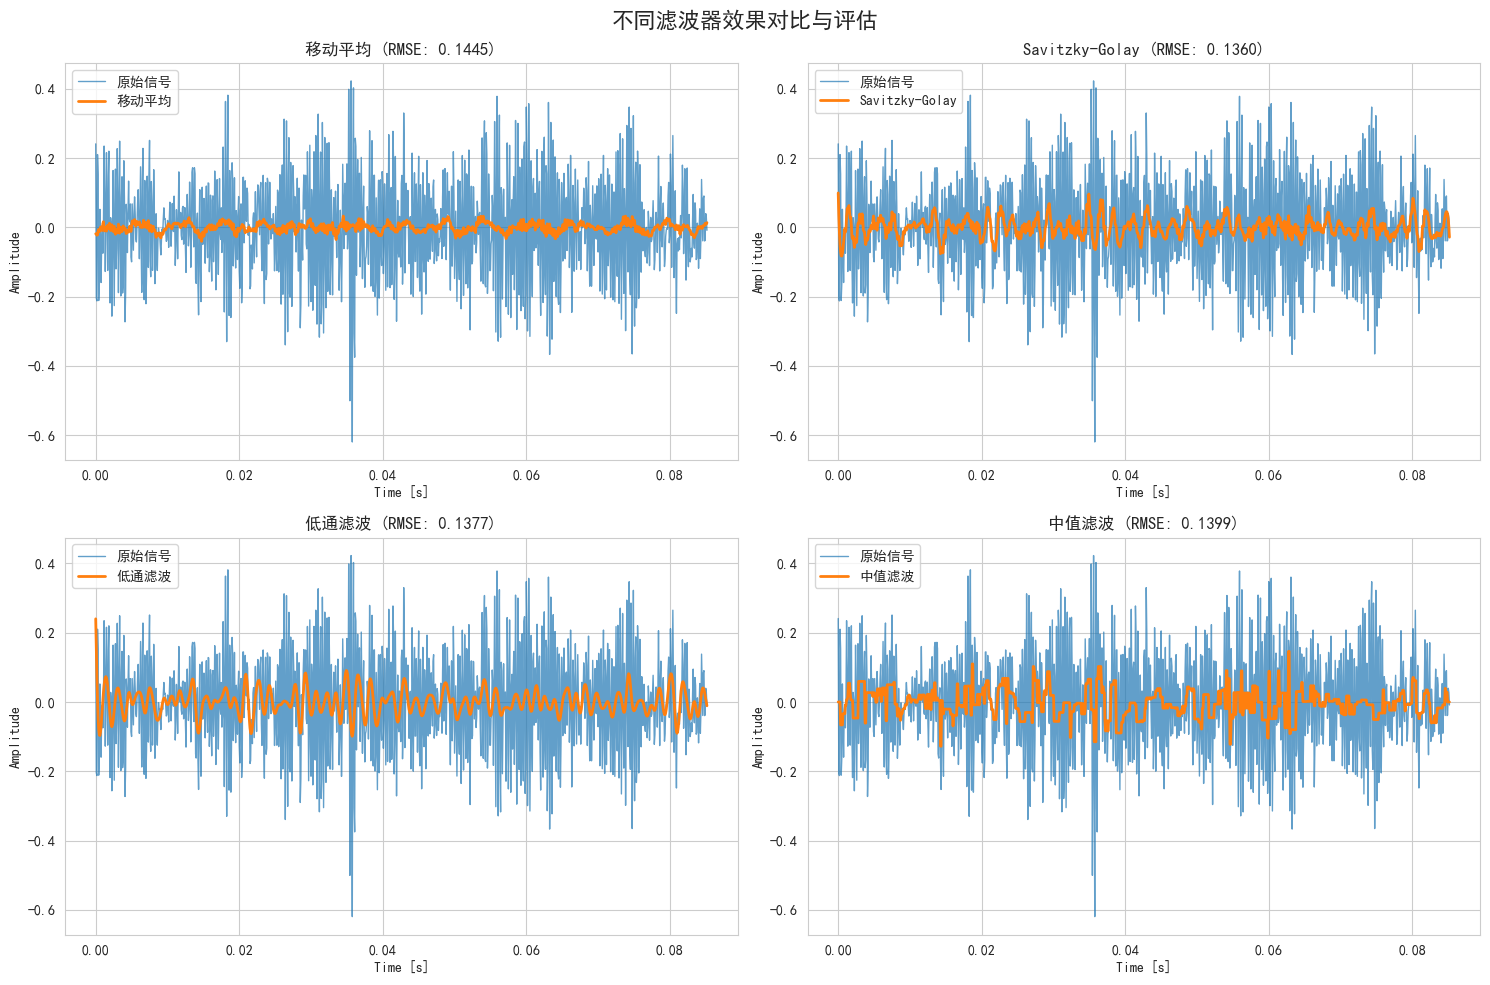

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


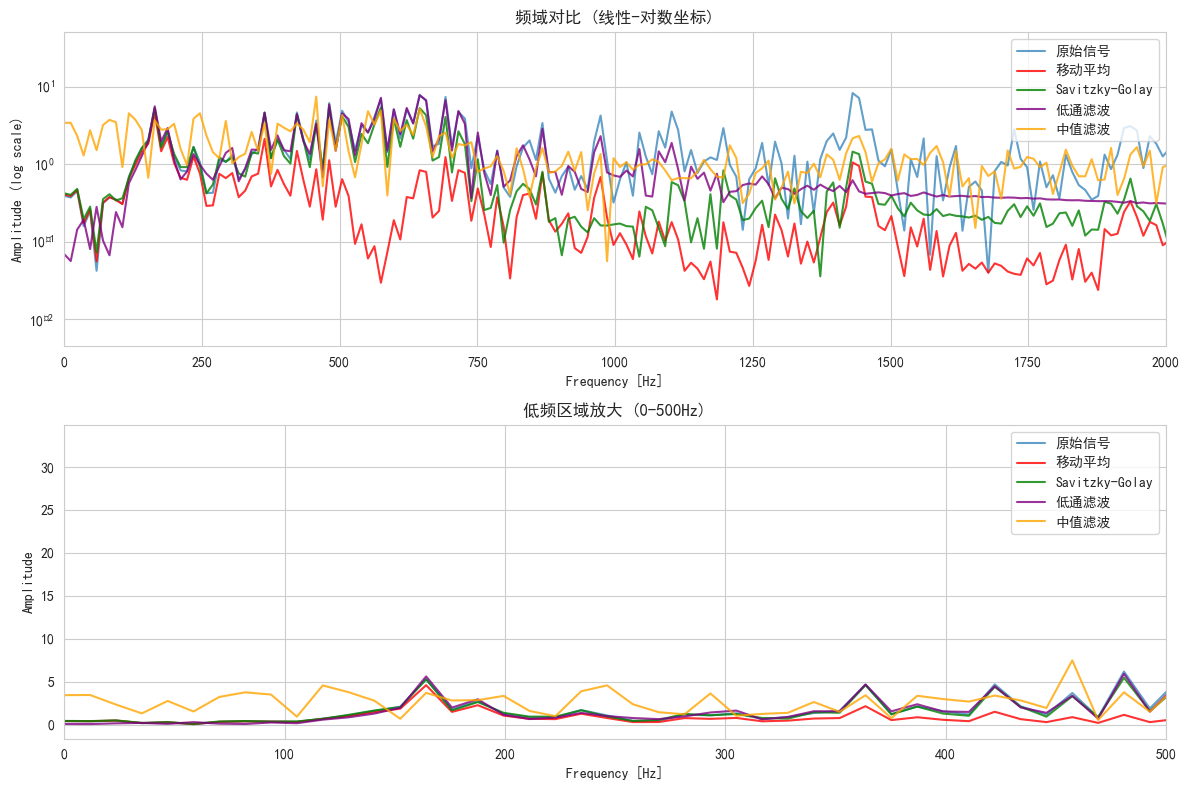

In [52]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# 1. 加载数据
file_path = '源域数据集/12kHz_DE_data/B/0007/B007_0.mat'
mat_data = loadmat(file_path, squeeze_me=True)
de_signal = mat_data['X118_DE_time'][1023 * 41:1023 * 42]
fs = 12000  # 采样率
time_axis = np.arange(len(de_signal)) / fs

# 2. 定义多种滤波器
# 移动平均滤波器
window_size = 21
smoothed_ma = np.convolve(de_signal, np.ones(window_size)/window_size, mode='same')

# Savitzky-Golay滤波器
smoothed_sg = signal.savgol_filter(de_signal, window_length=21, polyorder=3)

# 低通滤波器 (Butterworth)
cutoff_freq = 1000
nyquist = 0.5 * fs
normal_cutoff = cutoff_freq / nyquist
b, a = signal.butter(4, normal_cutoff, btype='low', analog=False)
smoothed_lp = signal.filtfilt(b, a, de_signal)

# 中值滤波器
smoothed_med = signal.medfilt(de_signal, kernel_size=11)

# 3. 评估滤波效果
def evaluate_filter(original, filtered, filter_name):
    """评估滤波器性能"""
    # 计算均方根误差 (RMSE)
    rmse = np.sqrt(np.mean((original - filtered) ** 2))

    # 计算信噪比改善 (SNR improvement)
    noise_original = original - np.mean(original)
    noise_filtered = filtered - np.mean(filtered)
    snr_improvement = 10 * np.log10(np.var(noise_original) / np.var(noise_filtered))

    # 计算平滑度 (基于二阶导数)
    smoothness = np.mean(np.abs(np.diff(filtered, n=2)))

    # 计算特征保持度 (相关系数)
    correlation = np.corrcoef(original, filtered)[0, 1]

    print(f"{filter_name:20} RMSE: {rmse:.6f}, SNR改善: {snr_improvement:.2f} dB, "
          f"平滑度: {smoothness:.6f}, 相关系数: {correlation:.4f}")

    return rmse, snr_improvement, smoothness, correlation

print("滤波器性能评估:")
filters = {
    "移动平均": smoothed_ma,
    "Savitzky-Golay": smoothed_sg,
    "低通滤波": smoothed_lp,
    "中值滤波": smoothed_med
}

results = {}
for name, filtered_signal in filters.items():
    results[name] = evaluate_filter(de_signal, filtered_signal, name)

# 4. 可视化比较
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('不同滤波器效果对比与评估', fontsize=16)

for i, (name, filtered_signal) in enumerate(filters.items()):
    row, col = i // 2, i % 2
    axes[row, col].plot(time_axis, de_signal, label='原始信号', alpha=0.7, linewidth=1)
    axes[row, col].plot(time_axis, filtered_signal, label=f'{name}', linewidth=2)
    axes[row, col].set_title(f'{name} (RMSE: {results[name][0]:.4f})')
    axes[row, col].set_xlabel('Time [s]')
    axes[row, col].set_ylabel('Amplitude')
    axes[row, col].grid(True)
    axes[row, col].legend()

plt.tight_layout()
plt.show()

# 5. 频域分析
plt.figure(figsize=(12, 8))

# 计算原始信号的频谱
frequencies_orig = np.fft.fftfreq(len(de_signal), 1/fs)
fft_orig = np.abs(np.fft.fft(de_signal))
fft_orig = fft_orig[:len(fft_orig)//2]  # 只取正频率部分
frequencies_orig = frequencies_orig[:len(frequencies_orig)//2]

plt.subplot(2, 1, 1)
plt.semilogy(frequencies_orig, fft_orig, label='原始信号', alpha=0.7)

# 计算并绘制各滤波后信号的频谱
colors = ['red', 'green', 'purple', 'orange']
for i, (name, filtered_signal) in enumerate(filters.items()):
    fft_filtered = np.abs(np.fft.fft(filtered_signal))
    fft_filtered = fft_filtered[:len(fft_filtered)//2]
    plt.semilogy(frequencies_orig, fft_filtered, label=name, alpha=0.8, color=colors[i])

plt.title('频域对比 (线性-对数坐标)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude (log scale)')
plt.grid(True)
plt.legend()
plt.xlim(0, 2000)  # 限制频率范围以便观察

# 放大观察低频区域
plt.subplot(2, 1, 2)
plt.plot(frequencies_orig, fft_orig, label='原始信号', alpha=0.7)
for i, (name, filtered_signal) in enumerate(filters.items()):
    fft_filtered = np.abs(np.fft.fft(filtered_signal))
    fft_filtered = fft_filtered[:len(fft_filtered)//2]
    plt.plot(frequencies_orig, fft_filtered, label=name, alpha=0.8, color=colors[i])

plt.title('低频区域放大 (0-500Hz)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.xlim(0, 500)  # 重点关注低频区域

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
fs = 12000
def savitzky(de_signal):
    time_axis = np.arange(len(de_signal)) / fs

    # 定义多组参数进行对比
    parameter_sets = [
        # {'window_length': 15, 'polyorder': 2, 'color': 'red', 'label': 'WL=15, PO=2'},
        # {'window_length': 21, 'polyorder': 3, 'color': 'blue', 'label': 'WL=21, PO=3'},
        # {'window_length': 25, 'polyorder': 3, 'color': 'green', 'label': 'WL=25, PO=3'},
        {'window_length': 31, 'polyorder': 4, 'color': 'purple', 'label': 'WL=31, PO=4'},
        # {'window_length': 31, 'polyorder': 3, 'color': 'orange', 'label': 'WL=41, PO=3'}
    ]

    # 应用不同参数的滤波器
    plt.figure(figsize=(14, 10))

    # 绘制原始信号
    plt.subplot(2, 1, 1)
    plt.plot(time_axis, de_signal, 'k-', alpha=0.3, label='原始信号', linewidth=1)
    plt.show()

    # # 评估不同参数组合的性能
    # def evaluate_sg_params(original, window_length, polyorder):
    #     """评估特定参数组合的Savitzky-Golay滤波器性能"""
    #     smoothed = signal.savgol_filter(original, window_length, polyorder)
    #
    #     # 计算评估指标
    #     rmse = np.sqrt(np.mean((original - smoothed) ** 2))
    #     noise_original = original - np.mean(original)
    #     noise_filtered = smoothed - np.mean(smoothed)
    #     snr_improvement = 10 * np.log10(np.var(noise_original) / np.var(noise_filtered))
    #     correlation = np.corrcoef(original, smoothed)[0, 1]
    #
    #     return rmse, snr_improvement, correlation
    #
    # print("不同参数组合的性能评估:")
    # print("WL=窗口长度, PO=多项式阶数")
    # print("组合\t\tRMSE\t\tSNR改善(dB)\t相关系数")
    # print("-" * 55)
    #
    # for params in parameter_sets:
    #     rmse, snr_imp, corr = evaluate_sg_params(
    #         de_signal,
    #         params['window_length'],
    #         params['polyorder']
    #     )
    #     print(f"WL={params['window_length']}, PO={params['polyorder']}\t{rmse:.6f}\t{snr_imp:.2f}\t\t{corr:.4f}")

# Savitzky-Golay 滤波器

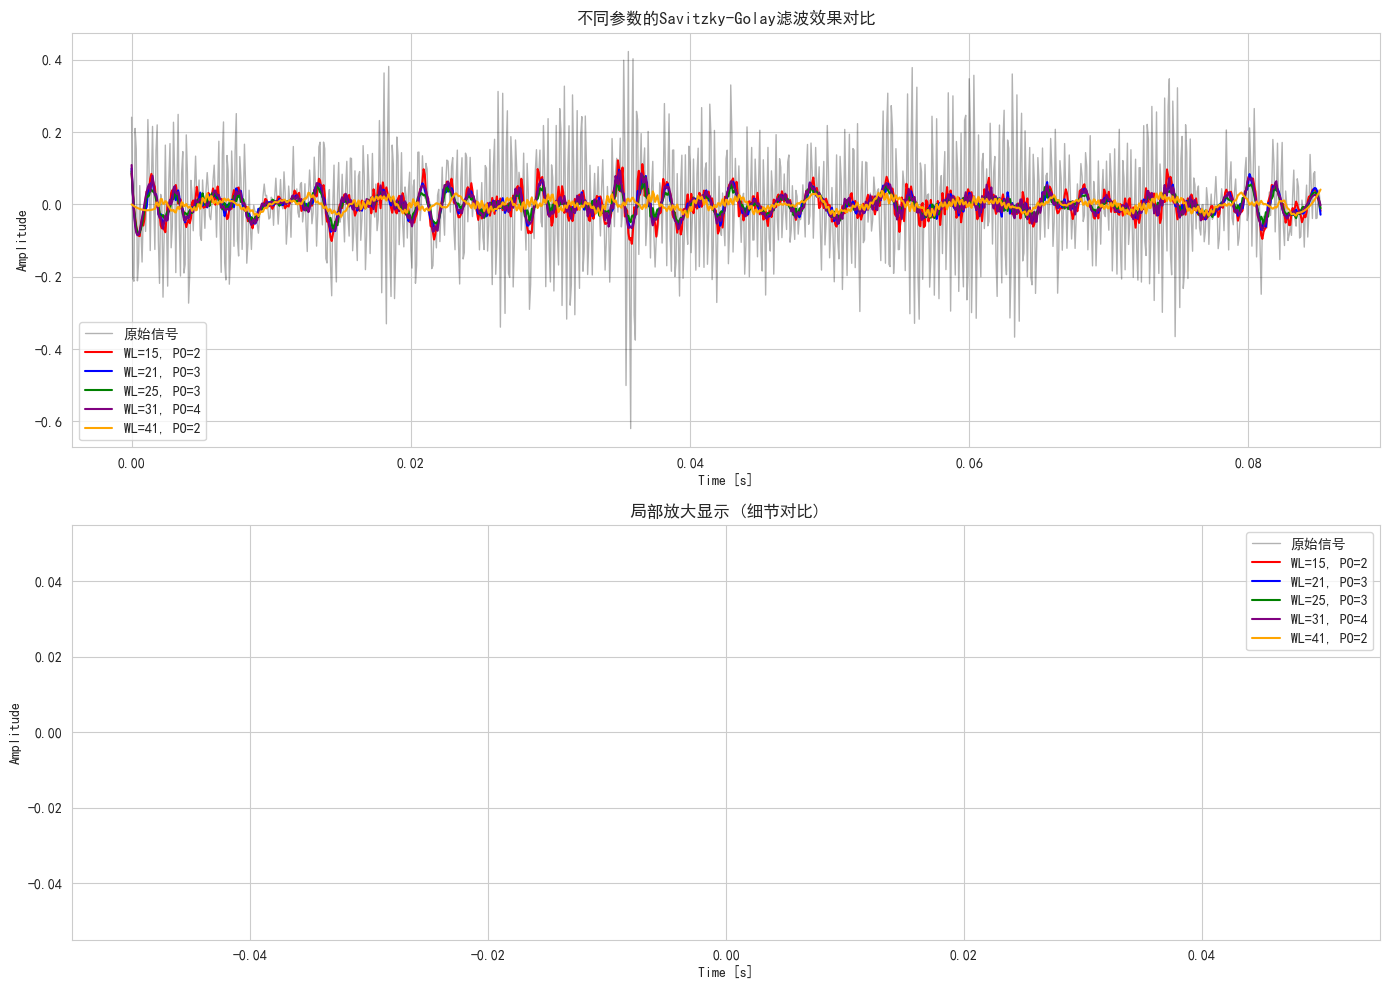

不同参数组合的性能评估:
WL=窗口长度, PO=多项式阶数
组合		RMSE		SNR改善(dB)	相关系数
-------------------------------------------------------
WL=15, PO=2	0.144586	12.14		0.0553
WL=21, PO=3	0.135976	14.19		0.3170
WL=25, PO=3	0.139531	15.78		0.1959
WL=31, PO=4	0.135160	13.64		0.3363
WL=41, PO=2	0.139780	20.17		0.2215


In [49]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 加载数据
file_path = '源域数据集/12kHz_DE_data/B/0007/B007_0.mat'
mat_data = loadmat(file_path, squeeze_me=True)
de_signal = mat_data['X118_DE_time'][1023 * 41:1023 * 42]
fs = 12000
time_axis = np.arange(len(de_signal)) / fs

# 定义多组参数进行对比
parameter_sets = [
    {'window_length': 15, 'polyorder': 2, 'color': 'red', 'label': 'WL=15, PO=2'},
    {'window_length': 21, 'polyorder': 3, 'color': 'blue', 'label': 'WL=21, PO=3'},
    {'window_length': 25, 'polyorder': 3, 'color': 'green', 'label': 'WL=25, PO=3'},
    {'window_length': 31, 'polyorder': 4, 'color': 'purple', 'label': 'WL=31, PO=4'},
    {'window_length': 41, 'polyorder': 2, 'color': 'orange', 'label': 'WL=41, PO=2'}
]

# 应用不同参数的滤波器
plt.figure(figsize=(14, 10))

# 绘制原始信号
plt.subplot(2, 1, 1)
plt.plot(time_axis, de_signal, 'k-', alpha=0.3, label='原始信号', linewidth=1)

# 应用并绘制不同参数的滤波结果
for params in parameter_sets:
    smoothed = signal.savgol_filter(
        de_signal,
        window_length=params['window_length'],
        polyorder=params['polyorder']
    )
    plt.plot(time_axis, smoothed, color=params['color'],
             label=params['label'], linewidth=1.5)

plt.title('不同参数的Savitzky-Golay滤波效果对比')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# 放大显示关键区域以便详细观察
plt.subplot(2, 1, 2)
zoom_start, zoom_end = 0.1, 0.2  # 选择信号中有特征变化的区域
zoom_mask = (time_axis >= zoom_start) & (time_axis <= zoom_end)

plt.plot(time_axis[zoom_mask], de_signal[zoom_mask], 'k-', alpha=0.3,
         label='原始信号', linewidth=1)

for params in parameter_sets:
    smoothed = signal.savgol_filter(
        de_signal,
        window_length=params['window_length'],
        polyorder=params['polyorder']
    )
    plt.plot(time_axis[zoom_mask], smoothed[zoom_mask], color=params['color'],
             label=params['label'], linewidth=1.5)

plt.title('局部放大显示 (细节对比)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 评估不同参数组合的性能
def evaluate_sg_params(original, window_length, polyorder):
    """评估特定参数组合的Savitzky-Golay滤波器性能"""
    smoothed = signal.savgol_filter(original, window_length, polyorder)

    # 计算评估指标
    rmse = np.sqrt(np.mean((original - smoothed) ** 2))
    noise_original = original - np.mean(original)
    noise_filtered = smoothed - np.mean(smoothed)
    snr_improvement = 10 * np.log10(np.var(noise_original) / np.var(noise_filtered))
    correlation = np.corrcoef(original, smoothed)[0, 1]

    return rmse, snr_improvement, correlation

print("不同参数组合的性能评估:")
print("WL=窗口长度, PO=多项式阶数")
print("组合\t\tRMSE\t\tSNR改善(dB)\t相关系数")
print("-" * 55)

for params in parameter_sets:
    rmse, snr_imp, corr = evaluate_sg_params(
        de_signal,
        params['window_length'],
        params['polyorder']
    )
    print(f"WL={params['window_length']}, PO={params['polyorder']}\t{rmse:.6f}\t{snr_imp:.2f}\t\t{corr:.4f}")

# 时域特征查看

In [11]:
import pandas as pd

df=pd.read_csv('源域数据集\\12kHz_FE_data\B\\0007\\B007_1X283_BA_time_time_features.csv')
df

<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29352\2146844343.py:3: SyntaxWarning: invalid escape sequence '\B'
  df=pd.read_csv('源域数据集\\12kHz_FE_data\B\\0007\\B007_1X283_BA_time_time_features.csv')


,Unnamed: 0,Peak,Mean,RMS,Variance,Std,Abs_Mean,Crest_Factor,Impulse_Factor,Skewness,...,Mean_Pulse_Amplitude,Mean_First_Diff,Std_First_Diff,Mean_Second_Diff,Std_Second_Diff,Zero_Crossing_Rate,Autocorr_Max,Autocorr_First_Min,Energy,Power
0,0,0.381773,-0.000359,0.161448,0.026065,0.161448,0.14272,2.364679,2.674977,-0.039307,...,0.0,-0.000002,0.260071,0.000002,0.428185,7299.75,2502.290737,-2271.592625,2502.290737,0.026066


# 频域查看

In [10]:
df=pd.read_csv('源域数据集\\12kHz_FE_data\B\\0007\\B007_1X283_BA_time_frequency_features.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29352\3330787846.py:1: SyntaxWarning: invalid escape sequence '\B'
  df=pd.read_csv('源域数据集\\12kHz_FE_data\B\\0007\\B007_1X283_BA_time_frequency_features.csv')


,Unnamed: 0,Spectral_Mean,Spectral_Std,Spectral_RMS,Spectral_Skewness,Spectral_Kurtosis,Mean_Frequency,Median_Frequency,Peak_Frequency,Peak_Amplitude,...,Top_Peak_5_Amp,PSD_Mean,PSD_Std,PSD_Peak,PSD_Peak_Freq,Envelope_Spectral_Mean,Envelope_Spectral_RMS,Envelope_Spectral_Kurtosis,Envelope_Peak_Count,Envelope_Peak_Freq
0,0,0.000157,0.00103,0.001042,88.364598,10080.948321,3578.638308,3637.875,3637.875,0.128169,...,0.01517,0.000004,0.000059,0.001037,3632.8125,0.000136,0.002061,46168.278698,14973.0,118.0


# 时频域查看

In [9]:
df=pd.read_csv('源域数据集\\12kHz_FE_data\B\\0007\\B007_1X283_BA_time_time_frequency_features.csv')
df

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_29352\1910234452.py:1: SyntaxWarning: invalid escape sequence '\B'
  df=pd.read_csv('源域数据集\\12kHz_FE_data\B\\0007\\B007_1X283_BA_time_time_frequency_features.csv')


,Unnamed: 0,STFT_Mean,STFT_Std,STFT_Max,STFT_Min,STFT_Energy,STFT_Centroid,STFT_Bandwidth,Wavelet_aaaaa_Energy,Wavelet_aaaad_Energy,...,HHT_IF_Min,WVD_Mean,WVD_Std,WVD_Max,TF_Centroid_Time,TF_Centroid_Freq,TF_Spread_Time,TF_Spread_Freq,TF_Renyi_Entropy,TF_Shannon_Entropy
0,0,0.003915,0.011786,0.173627,0.0,14.942744,2971.204216,1411.655772,28.608124,17.284838,...,-5999.760565,0.000004,0.000026,0.000292,4.017784,2971.204216,2.303723,1411.655772,7.379388,7.938202


# 数据整合查看

In [59]:
df=pd.read_csv('源域数据集/12kHz_DE_data/IR_features.csv')
df

,key,Peak,Mean,RMS,Variance,Std,Abs_Mean,Crest_Factor,Impulse_Factor,Skewness,...,HHT_IF_Min,WVD_Mean,WVD_Std,WVD_Max,TF_Centroid_Time,TF_Centroid_Freq,TF_Spread_Time,TF_Spread_Freq,TF_Renyi_Entropy,TF_Shannon_Entropy
0,X105_DE_time,1.725587,-0.000114,0.291373,0.084898,0.291373,0.209122,5.922251,8.251594,0.169165,...,-5999.597376,1.394015e-05,3.066118e-05,0.000732,4.000288,2605.524282,2.310389,1155.894351,9.375781,10.205136
1,X105_FE_time,1.172676,0.000029,0.243500,0.059292,0.243500,0.192386,4.815914,6.095427,-0.206630,...,-5998.784008,9.732737e-06,2.260668e-05,0.000275,3.997175,2382.567547,2.313543,1370.432937,9.034778,10.106104
2,X105_BA_time,0.365937,-0.000035,0.090337,0.008161,0.090337,0.071770,4.050820,5.098756,0.101352,...,-5998.044433,1.339136e-06,4.111038e-06,0.000064,3.994374,1800.915698,2.314706,1195.588446,8.583218,9.688973
3,X106_DE_time,1.573068,0.000105,0.292284,0.085430,0.292284,0.207230,5.381980,7.590932,0.130048,...,-5999.586623,1.402798e-05,2.992497e-05,0.000495,4.004782,2615.098023,2.308715,1139.635264,9.465229,10.211502
4,X106_FE_time,1.185927,-0.000191,0.238117,0.056700,0.238117,0.187807,4.980445,6.314618,-0.147996,...,-5999.969448,9.304646e-06,2.119713e-05,0.000339,4.002338,2293.509047,2.309083,1339.538044,8.953151,10.129405
5,X106_BA_time,0.367211,-0.000115,0.095859,0.009189,0.095859,0.075793,3.830739,4.844897,0.018401,...,-5996.836933,1.508233e-06,4.677357e-06,0.000063,4.004727,1729.951756,2.311710,1156.850730,8.340969,9.493230
6,X107_DE_time,1.635068,0.000046,0.299852,0.089911,0.299852,0.213865,5.452917,7.645316,0.090293,...,-5999.938518,1.476056e-05,3.166317e-05,0.000550,4.004873,2598.559070,2.308609,1145.731067,9.419111,10.156487
7,X107_FE_time,0.929769,-0.000101,0.232351,0.053987,0.232351,0.184258,4.001562,5.046021,0.026104,...,-5998.700978,8.869045e-06,2.004380e-05,0.000361,4.008963,2251.095256,2.308495,1326.750071,9.157305,10.176275
8,X107_BA_time,0.366533,0.000028,0.096265,0.009267,0.096265,0.075191,3.807543,4.874702,-0.012900,...,-5994.041744,1.520867e-06,4.673357e-06,0.000080,4.007741,1667.626921,2.310807,1145.410042,8.492041,9.543090
9,X108_DE_time,1.512751,-0.000070,0.313076,0.098017,0.313076,0.223700,4.831896,6.762400,-0.012555,...,-5999.849719,1.608986e-05,3.913380e-05,0.000916,4.013993,2642.918310,2.310826,1152.924829,9.184246,10.048343


In [57]:
df['fault_type']='B'
df.to_csv('源域数据集/12kHz_DE_data/B_features.csv',index=True)